In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [18]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

0
1
2
3
4


<Figure size 432x288 with 0 Axes>

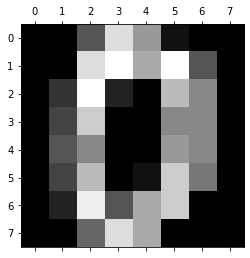

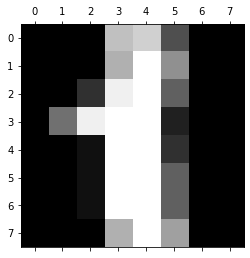

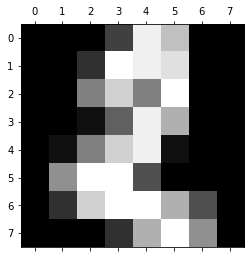

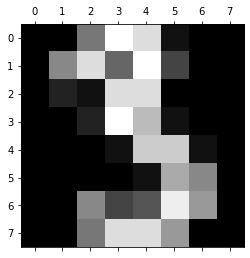

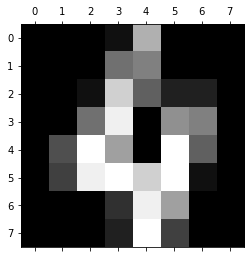

In [21]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    print(digits.target[i])

In [22]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [39]:
y_train

array([0, 5, 9, ..., 2, 4, 4])

In [40]:
len(X_test)

360

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

/Users/adithyavijaykumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adithyavijaykumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model.score(X_test, y_test)

0.9694444444444444

7


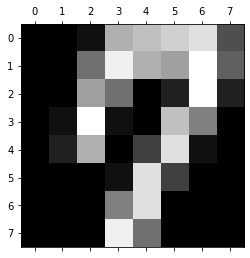

In [49]:
plt.matshow(digits.images[467])
print(digits.target[467])

In [48]:
model.predict([digits.data[467]])

array([7])

## Where does the model fail - CONFUSION MATRIX

In [50]:
y_predicted = model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[33  0  0  0  0  0  0  0  1  0]
 [ 0 33  0  0  0  0  1  0  1  0]
 [ 0  0 29  1  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  1  0  0  0 35  0  1  1  1]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 33  1  0]
 [ 0  1  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 34]]


Text(69.0, 0.5, 'truth')

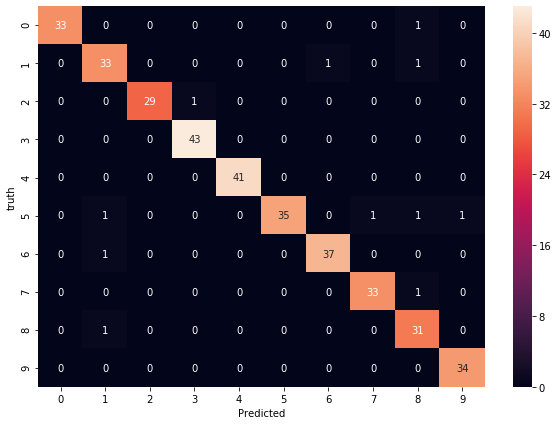

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')